# Data visualization for tests performed during master thesis

This document contains graphs and other representations of data collected for testing purposes during the master thesis. Bellow are the methods used to analyse the results.

In [22]:
def get_average(list):
    average = 0.0
    for i in range(len(list)):
        average = average+list[i]
    average = average/len(list)
    return average

def get_median(list):
    list.sort()
    median = 0.0
    if(len(list) % 2 == 0):
        median = list[len(list)//2] + (list[len(list)//2+1]-list[len(list)//2])
    else:
        median = list[len(list)//2+1]
    return median    

## Sift test:

The first feature detector tested is sift. Here all the parameters are tested in terms of number of features found, number of features that match the annotated image as well as the time it takes to find the features. During testing only the 1000 best features where kept, due to the fact that too many features would make everything slower as well as make it harder to detect any specific shape amongst them.

### Contrast threshold tests:

The variable that had the most imediate influence on the number of features detected was experienced to be the contrast threshold.
It was therefore the first variable that was tested. The remaining variable where kept constant at their advised values. Those being:<br>
Layers: 3<br>
Edge threshold: 10<br>
Sigma: 1.6<br>
With precise upscaling disabled.<br>

The recorded data can be categorized into three categories. Those being clear video feeds of only pillars, pillars located within tanks and pillars located in crowded environments. The different parameters are tested on each of these categories.

#### Clear video feed

Three videos where categorized as containing only a pillar in an empty underwater environment. From these a total of 150 frames, where taken and annotated for these tests. The frames where taken at an equal interval ensuring that frames from every part of the videos where used.<br>

First the test results are read.

In [23]:
import csv

number_of_tests = 11
paths = []
contrast_thresholds = [0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008]
# Get all file paths
for i in range(number_of_tests):
    path = '../Data/Sift/Clear_Dataset/contrast_test_'+ str(i) +'_results.csv'
    paths.append(path)

# Extract desired information
all_feature_counts = []
all_percentages = []
all_time_counts = []

for i in range(number_of_tests):
    feature_counts = []
    percentages = []
    time_counts = []
    with open(paths[i], mode ='r')as file:
        csvFile = csv.reader(file)
        line_number = 0
        for lines in csvFile:
            # Skip first line
            if line_number != 0:
                feature_counts.append(float(lines[2]))
                # Only read positive percentages
                if float(lines[4]) >= 0:
                    percentages.append(float(lines[4]))
                time_counts.append(float(lines[5]))
            line_number = line_number+1
    all_feature_counts.append(feature_counts)
    all_percentages.append(percentages)
    all_time_counts.append(time_counts)

Then the data is processed.

In [24]:
# Go through all tests
all_feature_medians = []
all_feature_averages = []
all_percentage_medians = []
all_percentage_averages = []
all_time_medians = []
all_time_averages = []

for i in range(number_of_tests):
    feature_average = get_average(all_feature_counts[i])
    feature_median = get_median(all_feature_counts[i])
    percentage_average = get_average(all_percentages[i])
    percentage_median = get_median(all_percentages[i])
    time_average = get_average(all_time_counts[i])
    time_median = get_median(all_time_counts[i])

    all_feature_medians.append(feature_median)
    all_feature_averages.append(feature_average)
    all_percentage_medians.append(percentage_median)
    all_percentage_averages.append(percentage_average)
    all_time_medians.append(time_median)
    all_time_averages.append(time_average)

Then the data is visualized:

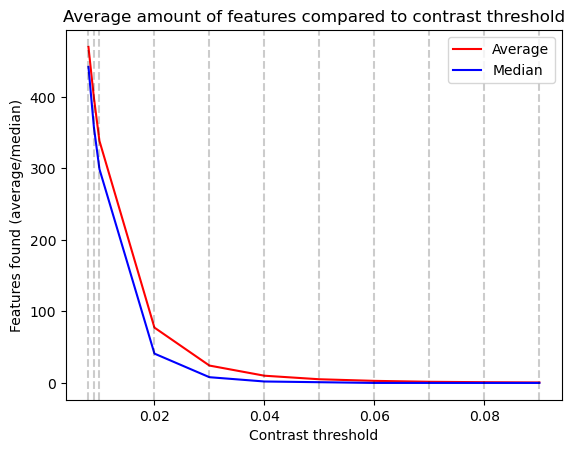

The biggest feature average was: 469.88 that was reached with contrast threshold: 0.008
The biggest feature median was: 442.0 that was reached with contrast threshold: 0.008


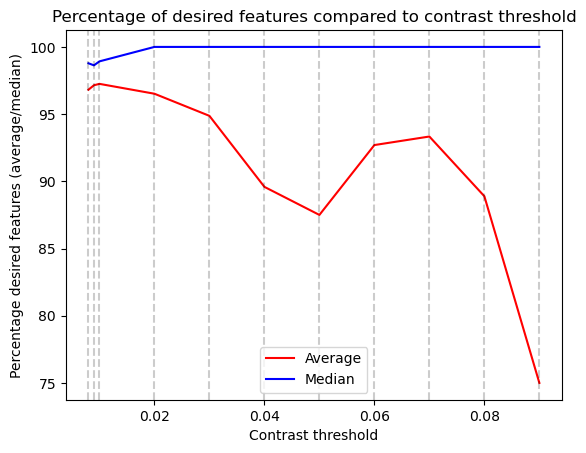

The biggest percentage average was: 97.25138999999997 that was reached with contrast threshold: 0.01
The biggest percentage median was: 100.0 that was reached with contrast threshold: 0.09


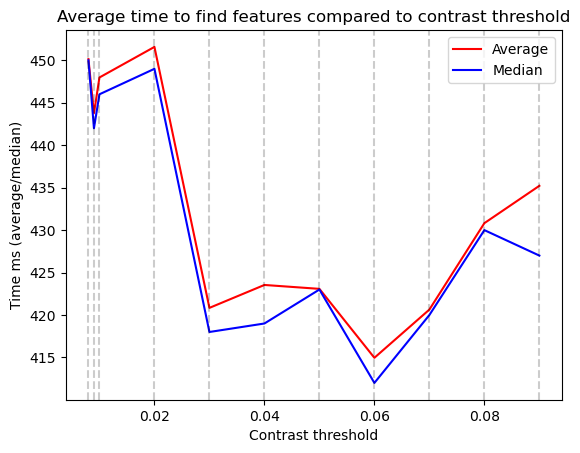

The smallest time average was: 414.96 that was reached with contrast threshold: 0.06
The smallest time median was: 412.0 that was reached with contrast threshold: 0.06


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Plot averages and medians
plt.plot(contrast_thresholds,all_feature_averages,color='r',label = "Average")
plt.plot(contrast_thresholds,all_feature_medians,color='b',label = "Median")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)
plt.xlabel('Contrast threshold')
plt.ylabel('Features found (average/median)')
plt.title('Average amount of features compared to contrast threshold')
plt.legend()
plt.show()
max_average = max(all_feature_averages)
max_median = max(all_feature_medians)
print("The biggest feature average was: " + str(max_average) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_feature_averages.index(max_average)]))
print("The biggest feature median was: " + str(max_median) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_feature_medians.index(max_median)]))

plt.plot(contrast_thresholds,all_percentage_averages,color='r',label = "Average")
plt.plot(contrast_thresholds,all_percentage_medians,color='b',label = "Median")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)
plt.xlabel('Contrast threshold')
plt.ylabel('Percentage desired features (average/median)')
plt.title('Percentage of desired features compared to contrast threshold')
plt.legend()
plt.show()
max_average = max(all_percentage_averages)
max_median = max(all_percentage_medians)
print("The biggest percentage average was: " + str(max_average) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_percentage_averages.index(max_average)]))
print("The biggest percentage median was: " + str(max_median) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_percentage_medians.index(max_median)]))

plt.plot(contrast_thresholds,all_time_averages,color='r',label = "Average")
plt.plot(contrast_thresholds,all_time_medians,color='b',label = "Median")
for i in range(number_of_tests):
    plt.axvline(x=contrast_thresholds[i],color='k',linestyle = 'dashed',alpha=0.2)
plt.xlabel('Contrast threshold')
plt.ylabel('Time ms (average/median)')
plt.title('Average time to find features compared to contrast threshold')
plt.legend()
plt.show()
min_average = min(all_time_averages)
min_median = min(all_time_medians)
print("The smallest time average was: " + str(min_average) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_time_averages.index(min_average)]))
print("The smallest time median was: " + str(min_median) + " that was reached with contrast threshold: " + str(contrast_thresholds[all_time_medians.index(min_median)]))


From this test it can be seen that all sizes of the contrast threshold has some benefit. Large values might result in less features, but at least almost all features are located inside the desired area. Middle values seem to be the fastest performing, while the low values find alot of features. The best compromise seem to be around 0.02-0.03, where 0.03 perform well in terms of time and accuracy, while 0.02 performs slightly better in number of features, but way worse in time spent. Since the quality of the features is more important than the amount of features, a contrast threshold of 0.03 seems to be the best choice. But lets try to analyze the boxplots as well.

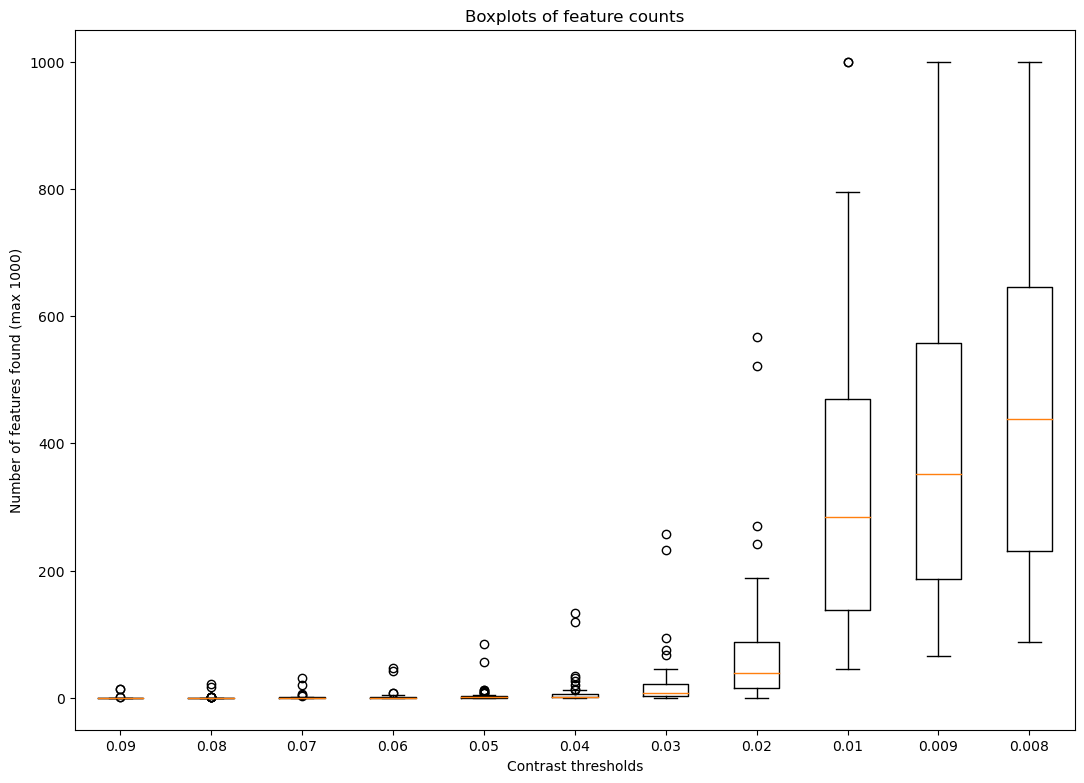

Contrast threshold 0.09 min: 0.0 max: 14.0
Contrast threshold 0.08 min: 0.0 max: 22.0
Contrast threshold 0.07 min: 0.0 max: 31.0
Contrast threshold 0.06 min: 0.0 max: 47.0
Contrast threshold 0.05 min: 0.0 max: 85.0
Contrast threshold 0.04 min: 0.0 max: 133.0
Contrast threshold 0.03 min: 0.0 max: 258.0
Contrast threshold 0.02 min: 0.0 max: 567.0
Contrast threshold 0.01 min: 45.0 max: 1000.0
Contrast threshold 0.009 min: 66.0 max: 1000.0
Contrast threshold 0.008 min: 88.0 max: 1000.0


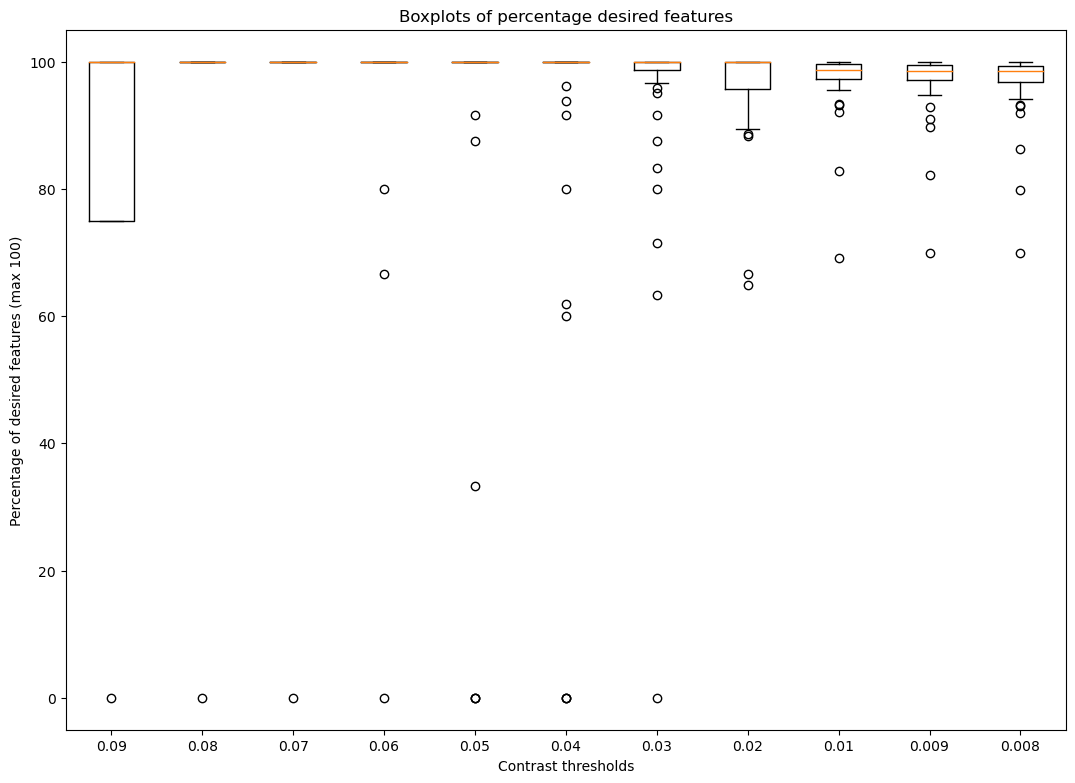

Contrast threshold 0.09 min: 0.0 max: 100.0
Contrast threshold 0.08 min: 0.0 max: 100.0
Contrast threshold 0.07 min: 0.0 max: 100.0
Contrast threshold 0.06 min: 0.0 max: 100.0
Contrast threshold 0.05 min: 0.0 max: 100.0
Contrast threshold 0.04 min: 0.0 max: 100.0
Contrast threshold 0.03 min: 0.0 max: 100.0
Contrast threshold 0.02 min: 64.876 max: 100.0
Contrast threshold 0.01 min: 69.0566 max: 100.0
Contrast threshold 0.009 min: 69.8601 max: 100.0
Contrast threshold 0.008 min: 69.9 max: 100.0


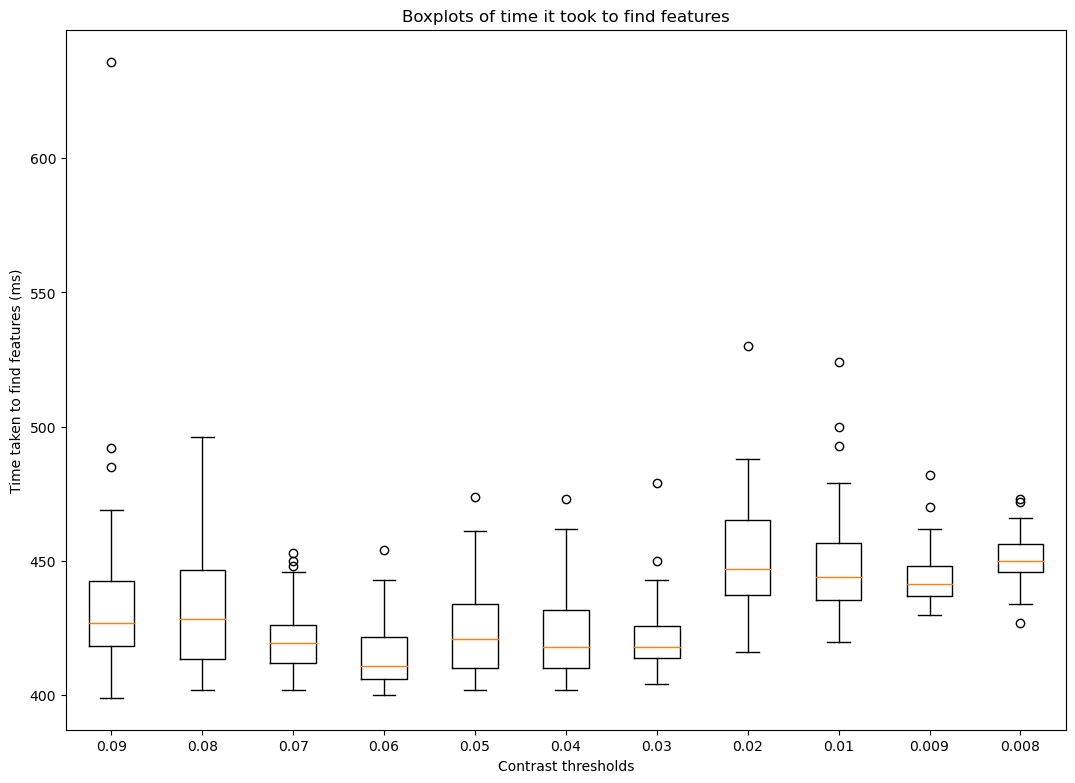

Contrast threshold 0.09 min: 399.0 max: 636.0
Contrast threshold 0.08 min: 402.0 max: 496.0
Contrast threshold 0.07 min: 402.0 max: 453.0
Contrast threshold 0.06 min: 400.0 max: 454.0
Contrast threshold 0.05 min: 402.0 max: 474.0
Contrast threshold 0.04 min: 402.0 max: 473.0
Contrast threshold 0.03 min: 404.0 max: 479.0
Contrast threshold 0.02 min: 416.0 max: 530.0
Contrast threshold 0.01 min: 420.0 max: 524.0
Contrast threshold 0.009 min: 430.0 max: 482.0
Contrast threshold 0.008 min: 427.0 max: 473.0


In [41]:
# create feature count boxplots
fig = plt.figure(figsize = (10,7))
axis = fig.add_axes([0,0,1,1])
boxplot = axis.boxplot(all_feature_counts)
axis.set_title('Boxplots of feature counts')
axis.set_xticklabels(contrast_thresholds)
axis.set_xlabel('Contrast thresholds')
axis.set_ylabel('Number of features found (max 1000)')
plt.show()

# Get and print all max and min values
for i in range(number_of_tests):
    min_features = min(all_feature_counts[i])
    max_features = max(all_feature_counts[i])
    print("Contrast threshold " + str(contrast_thresholds[i]) + " min: " + str(min_features) + " max: " + str(max_features))

# create percentages boxplots
fig = plt.figure(figsize = (10,7))
axis = fig.add_axes([0,0,1,1])
boxplot = axis.boxplot(all_percentages)
axis.set_title('Boxplots of percentage desired features')
axis.set_xticklabels(contrast_thresholds)
axis.set_xlabel('Contrast thresholds')
axis.set_ylabel('Percentage of desired features (max 100)')
plt.show()

# Get and print all max and min values
for i in range(number_of_tests):
    min_features = min(all_percentages[i])
    max_features = max(all_percentages[i])
    print("Contrast threshold " + str(contrast_thresholds[i]) + " min: " + str(min_features) + " max: " + str(max_features))

# create time boxplots
fig = plt.figure(figsize = (10,7))
axis = fig.add_axes([0,0,1,1])
boxplot = axis.boxplot(all_time_counts)
axis.set_title('Boxplots of time it took to find features')
axis.set_xticklabels(contrast_thresholds)
axis.set_xlabel('Contrast thresholds')
axis.set_ylabel('Time taken to find features (ms)')
plt.show()

# Get and print all max and min values
for i in range(number_of_tests):
    min_features = min(all_time_counts[i])
    max_features = max(all_time_counts[i])
    print("Contrast threshold " + str(contrast_thresholds[i]) + " min: " + str(min_features) + " max: " + str(max_features))